# Árboles de decisión: Scikit-learn

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

### Generar un dataset sintético

In [2]:
X, Y, theta = make_regression(n_samples=1000, n_features=3, n_targets=1, bias=1, noise=0.5, shuffle=True, coef=True, random_state=42)

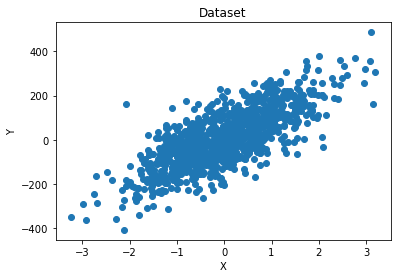

In [3]:
# TODO: Representa gráficamente el dataset para asegurarte que el término de error es suficientemente alto
plt.figure(1)

plt.title("Dataset")
plt.xlabel("X")
plt.ylabel("Y")

plt.scatter(X[:,0],Y)

plt.show()

### Preprocesar los datos

In [4]:
# TODO: Reordena los datos aleatoriamente
X_reord, Y_reord = shuffle(X,Y,random_state=42)

# TODO: Normaliza los ejemplos
scaler = preprocessing.StandardScaler().fit(X_reord)
X_escalada = scaler.transform(X_reord)

# TODO: Divide el dataset en subset de entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X_escalada,Y_reord,train_size = 0.8, test_size = 0.2, random_state=42)

### Entrena un modelo inicial

In [5]:
# TODO: Entrena un árbol de regresión sobre el subset de entrenamiento con máx. profundidad de 2
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=2)

In [6]:
#Comprobamos la idoneidad del modelo evalúandolo sobre el subset de test:
y_test_pred2 = regr_1.predict(X_test)
y_train_pred2 = regr_1.predict(X_train)

print("Datos de test")
mse = mean_squared_error(Y_test,y_test_pred2)
r2s = r2_score(Y_test, y_test_pred2)
print('Error cuadrático medio: %.2f', mse)
print('Coeficiente de determinación: %.2f', r2s)

print("Datos de training")
mse = mean_squared_error(Y_train,y_train_pred2)
r2s = r2_score(Y_train, y_train_pred2)
print('Error cuadrático medio: %.2f', mse)
print('Coeficiente de determinación: %.2f', r2s)

Datos de test
Error cuadrático medio: %.2f 6540.52615800163
Coeficiente de determinación: %.2f 0.5924771647961069
Datos de training
Error cuadrático medio: %.2f 6058.49532677274
Coeficiente de determinación: %.2f 0.6250914919192418


¿Crees que se da desviación o sobreajuste en dicho modelo? si porque no ha habido suficientes condiciones que pueda tomar como referencia. Por tanto habrá una desviación.

In [7]:
# TODO: Entrena otro árbol de regresión sobre el subset de entrenamiento con máx. profundidad de 6
regr_2 = DecisionTreeRegressor(max_depth=6)
regr_2.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=6)

In [8]:
# TODO: Evalúa el modelo con MSE y R^2 sobre el subset de entrenamiento
y_test_pred6 = regr_2.predict(X_test)
y_train_pred6 = regr_2.predict(X_train)

print("Datos de test")
mse = mean_squared_error(Y_test,y_test_pred6)
r2s = r2_score(Y_test, y_test_pred6)
print('Error cuadrático medio: %.2f', mse)
print('Coeficiente de determinación: %.2f', r2s)

print("Datos de training")
mse = mean_squared_error(Y_train,y_train_pred6)
r2s = r2_score(Y_train, y_train_pred6)
print('Error cuadrático medio: %.2f', mse)
print('Coeficiente de determinación: %.2f', r2s)

Datos de test
Error cuadrático medio: %.2f 1643.8486388376537
Coeficiente de determinación: %.2f 0.8975761518627025
Datos de training
Error cuadrático medio: %.2f 680.5881287524221
Coeficiente de determinación: %.2f 0.9578842160956219


Compara la precisión del entrenamiento de este modelo con el anterior (sobre el subset de entrenamiento).

¿Es mayor o menor al aumentar la profundidad máxima del árbol?

la precisión de un árbol de profundidad 2 es de 0.625 y la de un árbol de profundidad de 6 es de 0.957, por tanto es mayor. 

In [9]:
print(X_test.shape)
print(y_test_pred2.shape)
print(y_test_pred6.shape)

(200, 3)
(200,)
(200,)


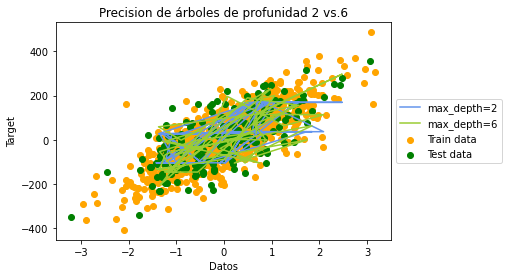

In [10]:
# TODO: Representa gráficamente las predicciones de ambos modelos

plt.figure(2)

plt.title("Precision de árboles de profunidad 2 vs.6")
plt.xlabel("Datos")
plt.ylabel("Target")

# Representa en un gráfico de puntos el subset de entrenamiento
plt.scatter(X_train[:,0],Y_train, color='orange', label="Train data")
# Representa en un gráfico de puntos el subset de test, con un color diferente
plt.scatter(X_test[:,0],Y_test, color = 'green', label = "Test data")

# Representa en un gráfico de líneas las predicciones de ambos modelos, con colores diferentes y una leyenda
# para distinguirlos
# Como eje horizontal, usa un espacio lineal de un gran nº de elementos entre el valor máx. y mín. de X
x_axis = X_test[:50,0]

plt.plot(x_axis,y_test_pred2[:50], color='cornflowerblue', label="max_depth=2")
plt.plot(x_axis, y_test_pred6[:50], color='yellowgreen', label="max_depth=6")

legend = plt.legend(loc="center left", bbox_to_anchor =(1,0.5))
plt.show()

Como hemos podido comprobar, generalmente **una profundidad máx. demasiado pequeña lleva a un modelo con desviación**, un modelo que no es capaz de ajustar suficientemente bien la curva, mientras que **una profundidad máx. demasiado alta lleva a un modelo con sobreajuste**, un modelo que ajusta demasiado bien la curva, pero que no tiene una buena precisión en ejemplos futuros.


In [11]:
# TODO: Entrena un modelo diferente para cada valor de *max_depth* considerado sobre un fold diferente

# Valores de max_depth a considerar
max_depths = list(range(1,8))
print('Profundidades máx. a considerar:')
print(max_depths)

alphas = np.random.random(8)
val_min=0
val_max=1e-3
alphas = (alphas*(val_max-val_min)+val_min)
print(alphas)

# Crea x splits de K-fold, uno por cada valor de max_depth a considerar
kf = KFold(n_splits=7)

# Itera sobre los splits, entrena tus modelos y evalúalos sobre el subset de CV generado
models = []
lista_scores = []
best_model = None
i=0

for train, cv in kf.split(X):
    # Entrena un modelo sobre el subset train
    # Evalúalo sobre el subset cv usando su método score()
    # Guarda el modelo con el mejor score en la variable best_model y muestra el alpha del mejor modelo
    X_train1, X_test1 = X[train], X[cv]
    Y_train1, Y_test1 = Y[train], Y[cv]
    
    alpha = Ridge(alpha=alphas[i])
    print('Profundidad máx. usada:', max_depths[i])
    
    model = alpha.fit(X_train1, Y_train1)
    models.append(model)
    
    y_pred = model.predict(X_test1)
    
    # Evalúalo sobre el subset de CV usando su método model.score()
    score = r2_score(Y_test1,y_pred)
    lista_scores.append(score)
    print(score)
    # Guarda el modelo con el mejor score en la variable best_model y muestra el alpha del mejor modelo
    # Si el modelo es mejor que el mejor modelo hasta ahora...
    if i==0:
        best_model = model
        best_depth = max_depths[i]
        best_score = score
    elif i>0: 
        if score > best_score: 
            best_model = model
            best_depth = max_depths[i]
            best_score = score
    print('Profundidad máx. del mejor árbol hasta ahora:', best_depth)
    i+=1

Profundidades máx. a considerar:
[1, 2, 3, 4, 5, 6, 7]
[0.00012481 0.0002106  0.00094914 0.00073334 0.00057171 0.0003078
 0.00097761 0.00057164]
Profundidad máx. usada: 1
0.9999806365835442
Profundidad máx. del mejor árbol hasta ahora: 1
Profundidad máx. usada: 2
0.9999862572280678
Profundidad máx. del mejor árbol hasta ahora: 2
Profundidad máx. usada: 3
0.9999852113110949
Profundidad máx. del mejor árbol hasta ahora: 2
Profundidad máx. usada: 4
0.9999806618418291
Profundidad máx. del mejor árbol hasta ahora: 2
Profundidad máx. usada: 5
0.9999863339585384
Profundidad máx. del mejor árbol hasta ahora: 5
Profundidad máx. usada: 6
0.9999880342653171
Profundidad máx. del mejor árbol hasta ahora: 6
Profundidad máx. usada: 7
0.9999853542662114
Profundidad máx. del mejor árbol hasta ahora: 6


### Evaluar el modelo sobre el subset de test

In [12]:
# Realiza las predicciones sobre el subset de test

y_test_pred = best_model.predict(X_test)

# Calcula las métricas de evaluación del modelo: RMSE y coeficiente de determinación R^2
rmse = mean_squared_error(Y_test,y_test_pred)
r_2 = r2_score(Y_test, y_test_pred)

print('Raíz del error cuadrático medio (RMSE): %.2f' % rmse)
print('Coeficiente de determinación: %.2f' % r_2)

Raíz del error cuadrático medio (RMSE): 34.22
Coeficiente de determinación: 1.00


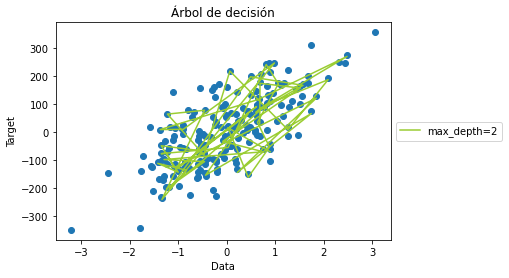

In [13]:
# TODO: Representa gráficamente las predicciones del mejor árbol sobre el subset de test

plt.figure(3)

plt.title("Árbol de decisión")
plt.xlabel("Data")
plt.ylabel("Target")

# Representa en un gráfico de puntos el subset de test
plt.scatter(X_test[:,0],Y_test)

# Representa en un gráfico de líneas las predicciones del modelo
# Como eje horizontal, usa un espacio lineal de un gran nº de elementos entre el valor máx. y mín. de X_test
x_axis = X_test[:50,0]

plt.plot(x_axis,y_test_pred[:50],color='yellowgreen', label="max_depth=2")
legend = plt.legend(loc="center left", bbox_to_anchor =(1,0.5))
plt.show()